In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import math
import datetime
import random
import os
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import accuracy_score, mean_squared_error,mean_absolute_error,r2_score
from sklearn import tree

In [2]:
userReviews = pd.read_csv("data/googleplaystore_user_reviews.csv")
appData = pd.read_csv("data/googleplaystore.csv")

## Google Play Store App Data

### Data Cleaning

In [3]:
appData.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [4]:
appData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
appData.dropna(axis=0, inplace=True)

In [6]:
appData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [7]:
#Converting 'Varies with device' to NaN
appData['Size'].replace('Varies with device', np.nan, inplace = True ) 

#Removing M&k from size
appData["Size"] = (appData["Size"].replace(r'[kM]+$', '', regex=True).astype(float) * \
             appData["Size"].str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))

# Replacing all the NaN values with the mean value of the column 'Size' 
appData['Size'].fillna(appData.groupby('Category')['Size'].transform('mean'),inplace = True)

#Removing '+' and ',' in Installs Column
appData["Installs"]=appData["Installs"].apply(lambda x: x.strip('+'))
appData["Installs"]=appData["Installs"].apply(lambda x: x.replace(',',''))
appData["Installs"].value_counts()

#Converting all data points to Numeric
appData["Installs"]=pd.to_numeric(appData["Installs"])

#Removing '$' in Price
appData["Price"]=appData["Price"].apply(lambda x: x.strip('$'))
#Converting all data points to Numeric
appData["Price"]=pd.to_numeric(appData["Price"])

In [8]:
appData.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Visualizations

#### Visualizing App Genres

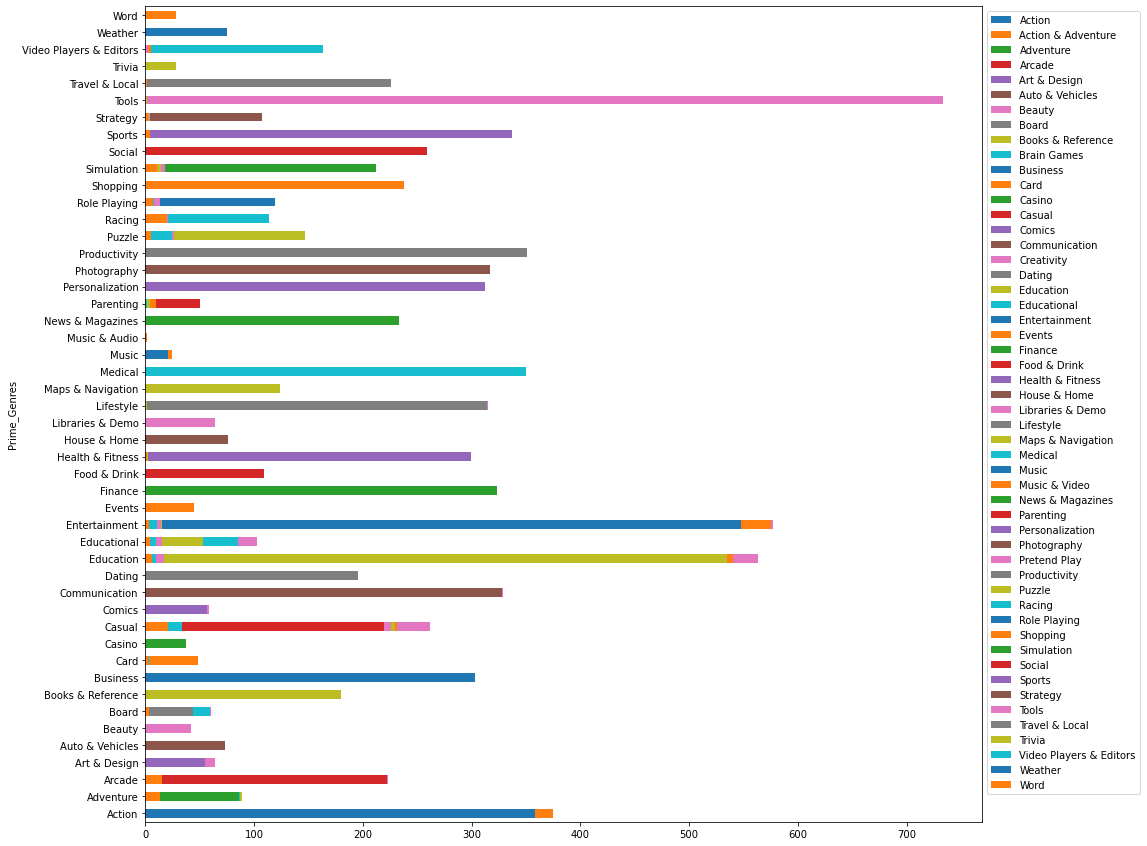

In [9]:
sep = ';'
rest = appData["Genres"].apply(lambda x: x.split(sep)[0])
appData['Prime_Genres']=rest
rest1 = appData["Genres"].apply(lambda x: x.split(sep)[-1])
appData['Second_Genres']=rest1
grouped = appData.groupby(['Prime_Genres','Second_Genres'])
twowaytable = pd.crosstab(index=appData["Prime_Genres"],columns=appData["Second_Genres"])
twowaytable.plot(kind="barh", figsize=(15,15),stacked=True)
plt.legend(bbox_to_anchor=(1.0,1.0))

#### Distribution of App Ratings

Text(0.5, 1.0, 'Distribution of Rating')

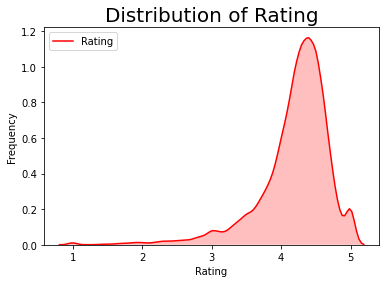

In [12]:
rating_plot = sns.kdeplot(appData["Rating"], color="Red", shade = True)
rating_plot.set_xlabel("Rating")
rating_plot.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

#### Free vs Paid Apps

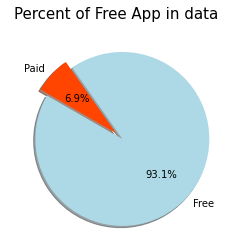

In [14]:
labels = appData['Type'].value_counts(sort = True).index
sizes = appData['Type'].value_counts(sort = True)


colors = ["lightblue","orangered"]
explode = (0.1,0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150,)

plt.title('Percent of Free App in data', size = 15)
plt.show()

#### Looking at content ratings per app

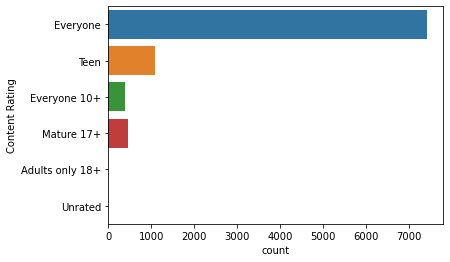

In [17]:
sns.countplot(y='Content Rating', data=appData)

### Data Tranformation

#### Label Encoding of Features

In [39]:
# Label encode App
le = LabelEncoder()
appData['App'] = le.fit_transform(appData["App"])

In [40]:
# Encode Genres
appData['Genres'] = le.fit_transform(appData['Genres'])

In [41]:
# Encode Category
CategoryList = appData['Category'].unique().tolist() 
CategoryList = ['cat_' + word for word in CategoryList]
appData = pd.concat([appData, pd.get_dummies(appData['Category'], prefix='cat')], axis=1)

In [42]:
appData['Content Rating'] = le.fit_transform(appData['Content Rating'])

In [44]:
appData['Type'] = pd.get_dummies(appData['Type'])
appData['Last Updated'] = appData['Last Updated'].apply(lambda x : time.mktime(datetime.datetime.strptime(x, '%B %d, %Y').timetuple()))

### Machine Learning and Predictive Analytics

In [45]:
features = ['App', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver']
features.extend(CategoryList)
X = appData[features]
y = appData['Rating']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

#### Model 1: Decision Tree Classifier

In [47]:
clf = tree.DecisionTreeRegressor(criterion='mae', max_depth=5, min_samples_leaf=5, random_state=42)

In [48]:
clf.fit(X_train, y_train)

ValueError: could not convert string to float: '2.4.2'